In [1]:
%pylab inline
import pandas as pd
import json
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import metrics

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_roc(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [3]:
files=!find results/ -name \*.txt |grep data9

In [4]:
files

['results/Capsule-Forensics-v2/data9.txt',
 'results/ClassNSeg/data9.txt',
 'results/MesoNet/data9.txt',
 'results/CNNDetection/data9.txt',
 'results/adversarial_deepfakes/data9.txt']

# results/adversarial_deepfakes/ 

In [8]:
df=pd.read_csv('results/adversarial_deepfakes/data9.txt', index_col=0, header=None)
df['probability']=df[1]
df['label']=df.index.map(lambda x: int('ffhq' in x or 'celeba' in x ))
df['pred']= (df['probability']>0.5).astype(np.int)
df['dataset']=df.index.map(lambda u: u.split('/')[-2])
df['correct']=(df['label']==df['pred']).astype(np.int)

In [9]:
df.groupby('dataset')[['correct']].aggregate(['mean','count'])

correct       
                   mean  count
dataset                       
FaceForensics  0.283873   2871
attgan         0.278435   6005
celeba         0.720063  35976
faceapp        0.314225    471
ffhq           0.710750   4000
gdwct          0.281556   3367
stargan        0.276558   5648
stylegan       0.282328   9999
stylegan2      0.281667   6000

In [10]:
confusion_matrix(df['label'],df['pred'],labels=[0,1])

array([[ 9658, 24703],
       [11228, 28748]])

In [11]:
print(1-df['label'].mean(),(df['label']==df['pred']).mean())

0.46223280465985983 0.5166471609023771


In [12]:
roc_auc_score(df['label'],df['probability'])

0.4997954773125801

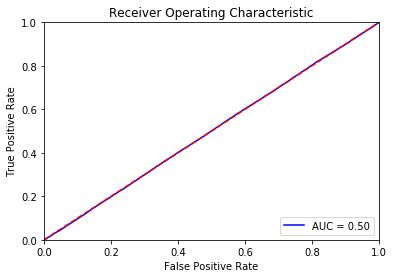

In [13]:
plot_roc(df['label'],df['probability'])

# results/CNNDetection/ 

In [15]:
df=pd.read_csv('results/CNNDetection/data9.txt', index_col=0, header=None)
df['probability']=df[1]
df['label']=df.index.map(lambda x: int('ffhq' in x or 'celeba' in x ))
df['pred']= (df['probability']>0.5).astype(np.int)
df['dataset']=df.index.map(lambda u: u.split('/')[-2])
df['correct']=(df['label']==df['pred']).astype(np.int)

In [16]:
df.groupby('dataset')[['correct']].aggregate(['mean','count'])

correct       
                   mean  count
dataset                       
FaceForensics  0.999303   2871
attgan         0.843131   6005
celeba         0.000751  35976
faceapp        1.000000    471
ffhq           0.000750   4000
gdwct          0.996139   3367
stargan        0.382082   5648
stylegan       0.985599   9999
stylegan2      0.909833   6000

In [17]:
confusion_matrix(df['label'],df['pred'],labels=[0,1])

array([[29229,  5132],
       [39946,    30]])

In [18]:
print(1-df['label'].mean(),(df['label']==df['pred']).mean())

0.46223280465985983 0.3935994188627467


In [19]:
roc_auc_score(df['label'],df['probability'])

0.275935407145163

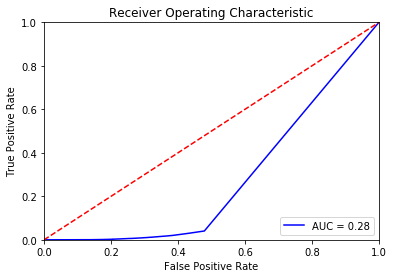

In [20]:
plot_roc(df['label'],df['probability'])

# results/patch-forensics/

In [72]:
df=pd.read_csv('results/patch-forensics/data9.txt', index_col=0, header=None)
df['probability']=df[1]
df['label']=df.index.map(lambda x: int('ffhq' in x or 'celeba' in x ))
df['pred']= (df['probability']>0.5).astype(np.int)
df['dataset']=df.index.map(lambda u: u.split('/')[-2])
df['correct']=(df['label']==df['pred']).astype(np.int)

In [73]:
df.groupby('dataset')[['correct']].aggregate(['mean','count'])

correct       
                   mean  count
dataset                       
FaceForensics  0.944619   2871
attgan         0.008326   6005
celeba         0.102068  35976
faceapp        0.666667    471
ffhq           0.000000   4000
gdwct          0.307989   3367
stargan        0.024788   5648
stylegan       1.000000   9999
stylegan2      1.000000   6000

In [74]:
confusion_matrix(df['label'],df['pred'],labels=[0,1])

array([[20252, 14109],
       [36304,  3672]])

In [75]:
print(1-df['label'].mean(),(df['label']==df['pred']).mean())

0.46223280465985983 0.3218316585280547


In [76]:
roc_auc_score(df['label'],df['probability'])

0.41731591550896885

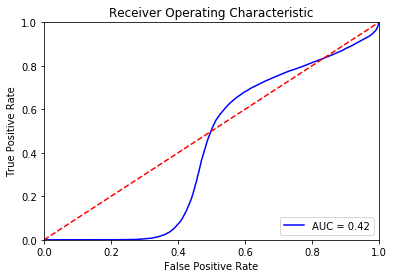

In [77]:
plot_roc(df['label'],df['probability'])

# results/MesoNet/ 

In [25]:
df=pd.read_csv('results/MesoNet/data9.txt', index_col=0, header=None)
df['probability']=df[1]
df['label']=df.index.map(lambda x: int('ffhq' in x or 'celeba' in x ))
df['pred']= (df['probability']>0.5).astype(np.int)
df['dataset']=df.index.map(lambda u: u.split('/')[-2])
df['correct']=(df['label']==df['pred']).astype(np.int)

In [26]:
df.groupby('dataset')[['correct']].aggregate(['mean','count'])

correct       
                   mean  count
dataset                       
FaceForensics  0.275514   2871
attgan         0.071940   6005
celeba         0.906215  35976
faceapp        0.112527    471
ffhq           0.873500   4000
gdwct          0.094743   3367
stargan        0.070822   5648
stylegan       0.041604   9999
stylegan2      0.045500   6000

In [27]:
confusion_matrix(df['label'],df['pred'],labels=[0,1])

array([[ 2684, 31677],
       [ 3880, 36096]])

In [28]:
print(1-df['label'].mean(),(df['label']==df['pred']).mean())

0.46223280465985983 0.5216783028639843


In [29]:
roc_auc_score(df['label'],df['probability'])

0.6157109740510353

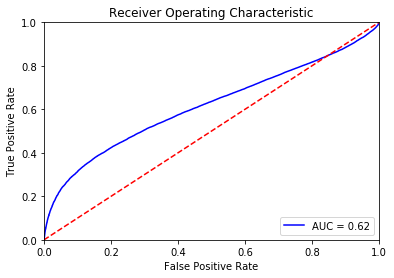

In [30]:
plot_roc(df['label'],df['probability'])

# results/ClassNSeg/ 

In [31]:
df=pd.read_csv('results/ClassNSeg/data9.txt', index_col=0, header=None, usecols=[0,2])
df['probability']=df[2]
df['label']=df.index.map(lambda x: int('ffhq' in x or 'celeba' in x ))
df['pred']= (df['probability']>0.5).astype(np.int)
df['dataset']=df.index.map(lambda u: u.split('/')[-2])
df['correct']=(df['label']==df['pred']).astype(np.int)

In [32]:
df.groupby('dataset')[['correct']].aggregate(['mean','count'])

correct       
                   mean  count
dataset                       
FaceForensics  0.738419   2871
attgan         0.099750   6005
celeba         0.749750  35976
faceapp        0.178344    471
ffhq           0.931000   4000
gdwct          0.164835   3367
stargan        0.178824   5648
stylegan       0.008801   9999
stylegan2      0.056000   6000

In [33]:
confusion_matrix(df['label'],df['pred'],labels=[0,1])

array([[ 4792, 29569],
       [ 9279, 30697]])

In [34]:
print(1-df['label'].mean(),(df['label']==df['pred']).mean())

0.46223280465985983 0.4774069440520871


In [35]:
roc_auc_score(df['label'],df['probability'])

0.3144346551617126

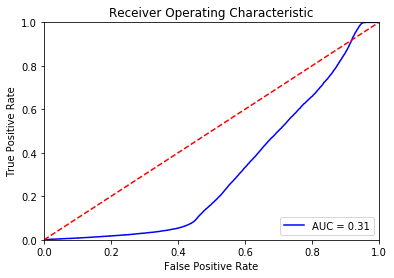

In [36]:
plot_roc(df['label'],df['probability'])

# results/Capsule-Forensics-v2/ 

In [37]:
df=pd.read_csv('results/Capsule-Forensics-v2/data9.txt', index_col=0, header=None)
df['probability']=df[2]
df['label']=df.index.map(lambda x: int('ffhq' in x or 'celeba' in x ))
df['pred']= (df['probability']>0.5).astype(np.int)
df['dataset']=df.index.map(lambda u: u.split('/')[-2])
df['correct']=(df['label']==df['pred']).astype(np.int)

In [38]:
df.groupby('dataset')[['correct']].aggregate(['mean','count'])

correct       
                   mean  count
dataset                       
FaceForensics  0.010101   2871
attgan         0.134221   6005
celeba         0.925673  35976
faceapp        0.061571    471
ffhq           0.228500   4000
gdwct          0.037422   3367
stargan        0.087996   5648
stylegan       0.945895   9999
stylegan2      0.964667   6000

In [39]:
confusion_matrix(df['label'],df['pred'],labels=[0,1])

array([[16733, 17628],
       [ 5760, 34216]])

In [40]:
print(1-df['label'].mean(),(df['label']==df['pred']).mean())

0.46223280465985983 0.6853787481335002


In [41]:
roc_auc_score(df['label'],df['probability'])

0.7040195025166783

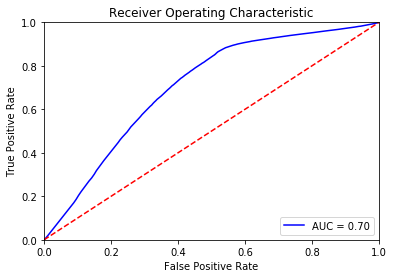

In [42]:
plot_roc(df['label'],df['probability'])

# Exploiting-Visual-Artifacts/dfgc2021_face2face

In [46]:
df=pd.read_csv('results/Exploiting-Visual-Artifacts/data9_face2face/scores.csv', index_col=0)
df['probability']=df['Score_MLP']
df['label']=df.index.map(lambda x: int('ffhq' in x or 'celeba' in x ))
df['pred']= (df['probability']>0.5).astype(np.int)
df['dataset']=df.index.map(lambda u: u.split('/')[-2])
df['correct']=(df['label']==df['pred']).astype(np.int)

In [47]:
df.groupby('dataset')[['correct']].aggregate(['mean','count'])

correct       
                   mean  count
dataset                       
FaceForensics  0.640195   2871
attgan         0.984180   6005
celeba         0.015510  35976
faceapp        0.993631    471
ffhq           0.102000   4000
gdwct          0.985150   3367
stargan        0.979816   5648
stylegan       0.841184   9999
stylegan2      0.957500   6000

In [48]:
confusion_matrix(df['label'],df['pred'],labels=[0,1])

array([[31223,  3138],
       [39010,   966]])

In [49]:
print(1-df['label'].mean(),(df['label']==df['pred']).mean())

0.46223280465985983 0.4330145149790817


In [50]:
roc_auc_score(df['label'],df['probability'])

0.3527491607737845

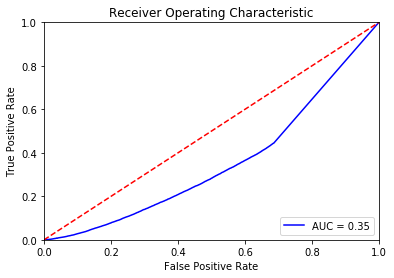

In [51]:
plot_roc(df['label'],df['probability'])

# Exploiting-Visual-Artifacts/dfgc2021_deepfake

In [58]:
df=pd.read_csv('results/Exploiting-Visual-Artifacts/data9_deepfake/scores.csv', index_col=0)
df['probability']=df['Score_MLP']
df['label']=df.index.map(lambda x: int('ffhq' in x or 'celeba' in x ))
df['pred']= (df['probability']>0.5).astype(np.int)
df['dataset']=df.index.map(lambda u: u.split('/')[-2])
df['correct']=(df['label']==df['pred']).astype(np.int)

In [59]:
df.groupby('dataset')[['correct']].aggregate(['mean','count'])

correct       
                   mean  count
dataset                       
FaceForensics  0.951585   2871
attgan         0.983347   6005
celeba         0.022737  35976
faceapp        0.980892    471
ffhq           0.072000   4000
gdwct          0.980992   3367
stargan        0.975921   5648
stylegan       0.948895   9999
stylegan2      0.927833   6000

In [60]:
confusion_matrix(df['label'],df['pred'],labels=[0,1])

array([[32969,  1392],
       [38870,  1106]])

In [61]:
print(1-df['label'].mean(),(df['label']==df['pred']).mean())

0.46223280465985983 0.45838546080686604


In [62]:
roc_auc_score(df['label'],df['probability'])

0.43657466852859894

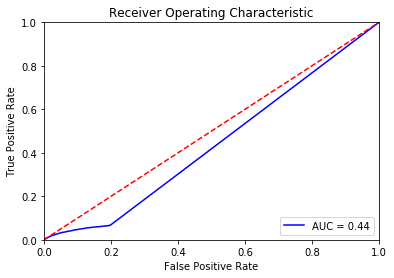

In [63]:
plot_roc(df['label'],df['probability'])

# CVPRW2019_Face_Artifacts

In [65]:
with open('results/CVPRW2019_Face_Artifacts/data9.json') as f:
    j=json.load(f)
df=pd.DataFrame(j).set_index('file_name')
#df.columns=['headpose_forensic_'+x for x in df.columns]
df['label']=df.index.map(lambda x: int('ffhq' in x or 'celeba' in x ))
df['pred']= (df['probability']>0.5).astype(np.int)
df['dataset']=df.index.map(lambda u: u.split('/')[-2])
df['correct']=(df['label']==df['pred']).astype(np.int)

In [66]:
df.groupby('dataset')[['correct']].aggregate(['mean','count'])

correct       
                   mean  count
dataset                       
FaceForensics  0.580982   2871
attgan         0.999001   6005
celeba         0.007171  35976
faceapp        1.000000    471
ffhq           0.012500   4000
gdwct          0.959905   3367
stargan        0.988669   5648
stylegan       0.994299   9999
stylegan2      1.000000   6000

In [67]:
confusion_matrix(df['label'],df['pred'],labels=[0,1])

array([[32896,  1465],
       [39668,   308]])

In [68]:
print(1-df['label'].mean(),(df['label']==df['pred']).mean())

0.46223280465985983 0.44666854998183947


In [69]:
roc_auc_score(df['label'],df['probability'])

0.4141877944932904

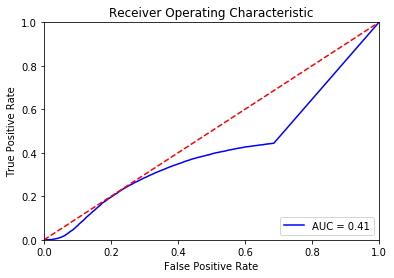

In [70]:
plot_roc(df['label'],df['probability'])

# headpose_forensic

In [78]:
with open('results/headpose_forensic/data9.json') as f:
    j=json.load(f)
df=pd.DataFrame(j).set_index('file_name')
#df.columns=['headpose_forensic_'+x for x in df.columns]
df['label']=df.index.map(lambda x: int('ffhq' in x or 'celeba' in x ))
df['pred']= (df['probability']>0.5).astype(np.int)

In [79]:
df['dataset']=df.index.map(lambda u: u.split('/')[-2])
df['correct']=(df['label']==df['pred']).astype(np.int)

In [80]:
df.groupby('dataset')[['correct']].aggregate(['mean','count'])

correct       
                   mean  count
dataset                       
FaceForensics  0.837339   2871
attgan         0.965529   6005
celeba         0.052424  35976
faceapp        0.953291    471
ffhq           0.209500   4000
gdwct          0.956935   3367
stargan        0.949540   5648
stylegan       0.832883   9999
stylegan2      0.836333   6000

In [81]:
confusion_matrix(df['label'],df['pred'],labels=[0,1])

array([[30582,  3779],
       [37252,  2724]])

In [82]:
print(1-df['label'].mean(),(df['label']==df['pred']).mean())

0.46223280465985983 0.44804067960773236


In [83]:
roc_auc_score(df['label'],df['probability'])

0.36838245594543945

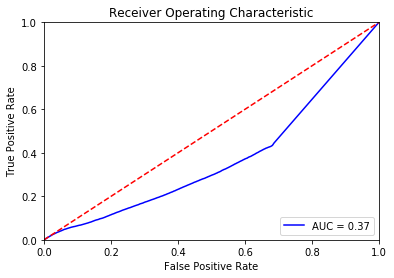

In [84]:
plot_roc(df['label'],df['probability'])